#### Data Load & Prep

In [7]:
import pandas as pd
import matplotlib.pyplot as plt



In [10]:
df = pd.read_csv("data.csv")

# derive decades programmatically
df["Decade_Published"] = (df["Year_Published"] // 10 * 10).astype(int).astype(str) + "s"
df["Decade_Banned"] = (df["Year_Banned"] // 10 * 10).astype(int).astype(str) + "s"

df.head(3)

,Book_ID,Title,Author,Year_Published,Year_Banned,Decade_Published,Decade_Banned,Years_To_Ban,Ban_Duration_Years,Country_Region,...,Theme_Tags,Theme_Count,Repeat_Ban,Author_Ban_Frequency,Reinstated,Legal_Challenge,Conflict_Period,Press_Freedom_Score,Source_Reference,Notes
0,1,Ulysses,James Joyce,1922,1933,1920s,1930s,11,11.0,United States,...,language;sexuality;modernism,3,1,2,1,1,0,NaN,ALA archives,Landmark obscenity case
1,2,The Satanic Verses,Salman Rushdie,1988,1989,1980s,1980s,1,NaN,Iran,...,religion;identity;free_speech,3,1,3,0,0,1,NaN,PEN America,International ban and fatwa
2,3,To Kill a Mockingbird,Harper Lee,1960,1966,1960s,1960s,6,NaN,United States,...,race;youth;justice,3,1,2,1,1,0,NaN,ALA banned books,Repeated school bans


Dataset Overview

In [11]:
df[[
    "Year_Published",
    "Year_Banned",
    "Years_To_Ban"
]].describe()


,Year_Published,Year_Banned,Years_To_Ban
count,119.000000,119.000000,119.000000
mean,1861.865546,1955.571429,93.705882
std,412.520999,89.022238,372.969403
min,-750.000000,1559.000000,0.000000
25%,1930.500000,1953.000000,3.000000
50%,1965.000000,1980.000000,8.000000
75%,1992.000000,2004.000000,20.000000
max,2019.000000,2022.000000,2566.000000


#### Books Banned by Decade (Primary Trend)

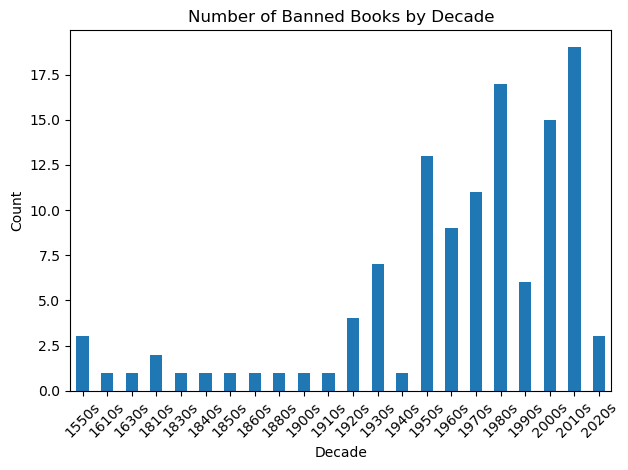

In [12]:
ban_by_decade = df["Decade_Banned"].value_counts().sort_index()

plt.figure()
ban_by_decade.plot(kind="bar")
plt.title("Number of Banned Books by Decade")
plt.xlabel("Decade")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Censorship over Time

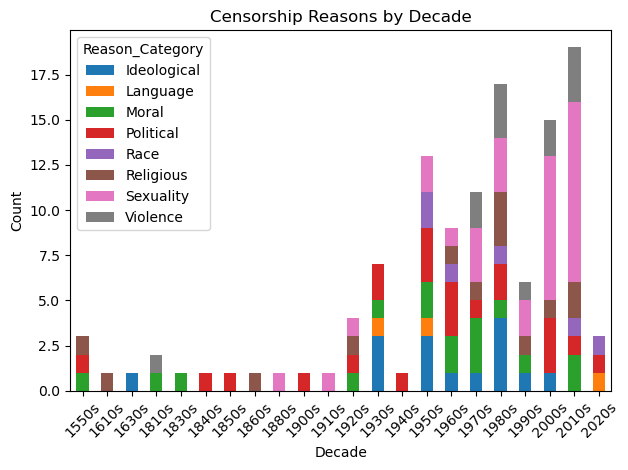

In [13]:
reason_decade = pd.crosstab(
    df["Decade_Banned"],
    df["Reason_Category"]
)

reason_decade.plot(kind="bar", stacked=True)
plt.title("Censorship Reasons by Decade")
plt.xlabel("Decade")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Region × Reason (Structural Differences)

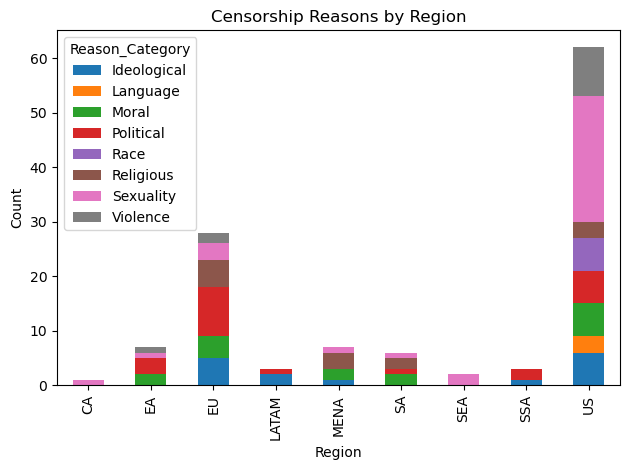

In [15]:
region_reason = pd.crosstab(
    df["Region_Code"],
    df["Reason_Category"]
)

region_reason.plot(kind="bar", stacked=True)
plt.title("Censorship Reasons by Region")
plt.xlabel("Region")
plt.ylabel("Count")
plt.tight_layout()
plt.show()



#### Time-to-Ban Distribution (Key Metric)

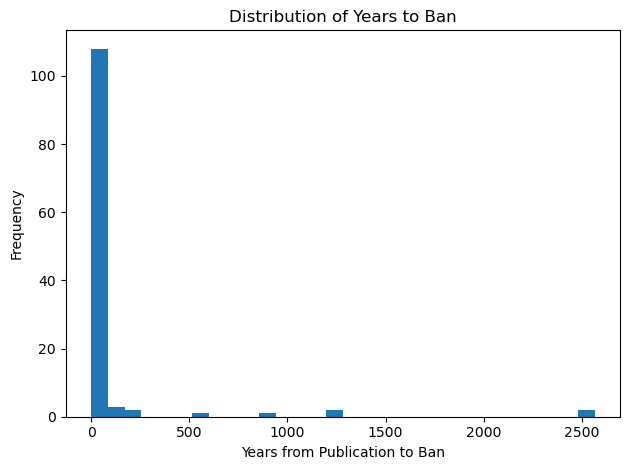

count     119.000000
mean       93.705882
std       372.969403
min         0.000000
25%         3.000000
50%         8.000000
75%        20.000000
90%        73.000000
max      2566.000000
Name: Years_To_Ban, dtype: float64

In [18]:
plt.figure()
df["Years_To_Ban"].plot(kind="hist", bins=30)
plt.title("Distribution of Years to Ban")
plt.xlabel("Years from Publication to Ban")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

df["Years_To_Ban"].describe(percentiles=[.25, .5, .75, .9])


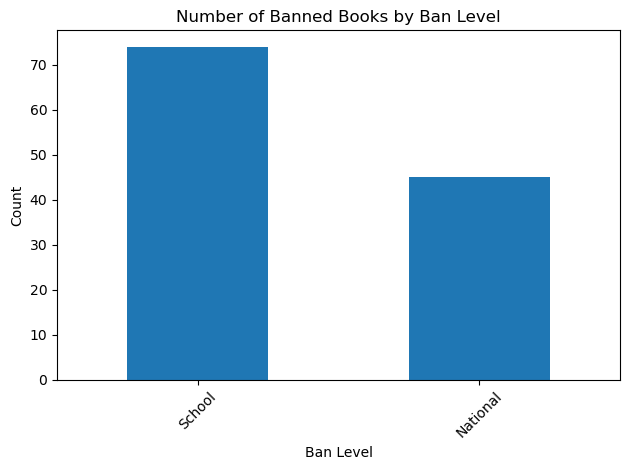

In [21]:

# Ban Level Composition

ban_level_counts = df["Ban_Level"].value_counts()
plt.figure()
ban_level_counts.plot(kind="bar")
plt.title("Number of Banned Books by Ban Level")
plt.xlabel("Ban Level")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Author Targeting (Repeat Bans)

In [23]:
df["Repeat_Ban"].value_counts()

df.groupby("Repeat_Ban")["Author_Ban_Frequency"].mean()



Repeat_Ban
0    1.00000
1    2.77551
Name: Author_Ban_Frequency, dtype: float64

chi-square: Reason x Regime Type

In [24]:
from scipy.stats import chi2_contingency

table = pd.crosstab(df["Regime_Type"], df["Reason_Category"])
chi2, p, dof, exp = chi2_contingency(table)

chi2, p


(46.8597796306761, 0.0009807872527860808)

Compare Time-to-Ban by Regime (Non-parametric)

In [26]:
from scipy.stats import kruskal

groups = [
    df[df["Regime_Type"] == r]["Years_To_Ban"]
    for r in df["Regime_Type"].unique()
]

kruskal(*groups)


KruskalResult(statistic=5.119370586693866, pvalue=0.16326203853570953)